In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [22]:
## load csv files in folder
folder = os.path.abspath('/home/filthyweeb/Downloads/good_metrics/Metrics')

files = [f for f in os.listdir(folder) if f.endswith('.csv')]

df_list = []
for f in files:
    splitted_filename = f.split('_')
    if '-' in splitted_filename[1]:
        model_name = splitted_filename[0]
    else:
        model_name = splitted_filename[0] + '_' + splitted_filename[1]

    temp_df = pd.read_csv(os.path.join(folder, f))
    temp_df['Model'] = model_name
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True)

print(np.unique(df['Model']))
print(df.columns.tolist())

['CNN' 'GRU' 'GRU_Attention' 'GRU_Conv' 'LSN' 'LSTM' 'MLP' 'STGCN' 'STTR']
['Event', 'TP', 'FP', 'FN', 'Precision', 'Recall', 'F1', 'MATE', 'median ATE', 'MATE_std', 'minmax ATE', 'MTE', 'median TE', 'MTE_std', 'minmax TE', 'Model']


In [28]:
## What to plot and how
metrics = ['Precision', 'Recall', 'F1']
ms_metrics = ['MATE', 'median ATE', 'MATE_std']
events = df['Event'].unique()
model_order = ['STTR', 'STGCN', 'LSTM', 'LSN', 'GRU', 'GRU_Attention', 'GRU_Conv', 'CNN', 'MLP']

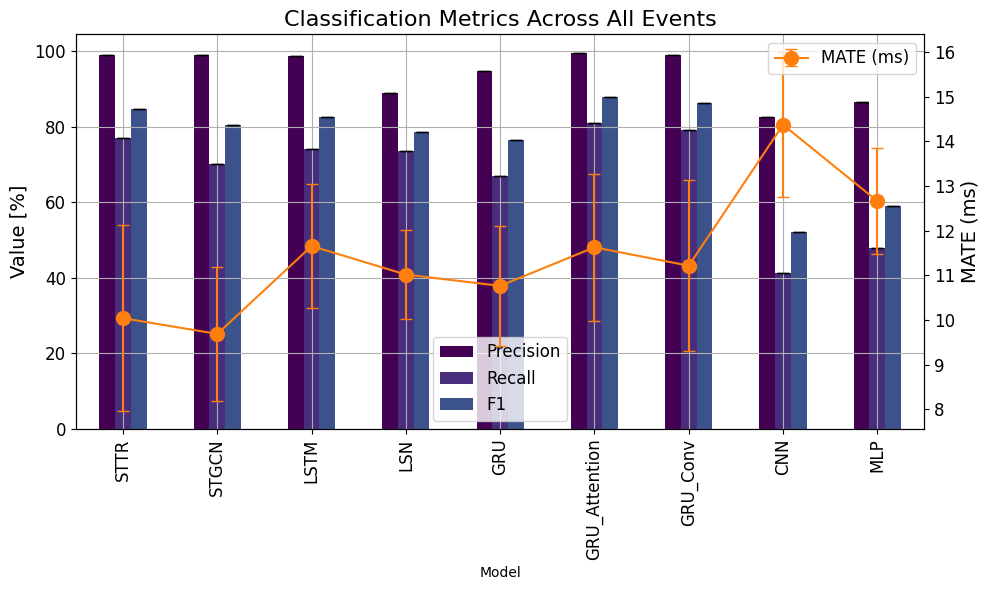

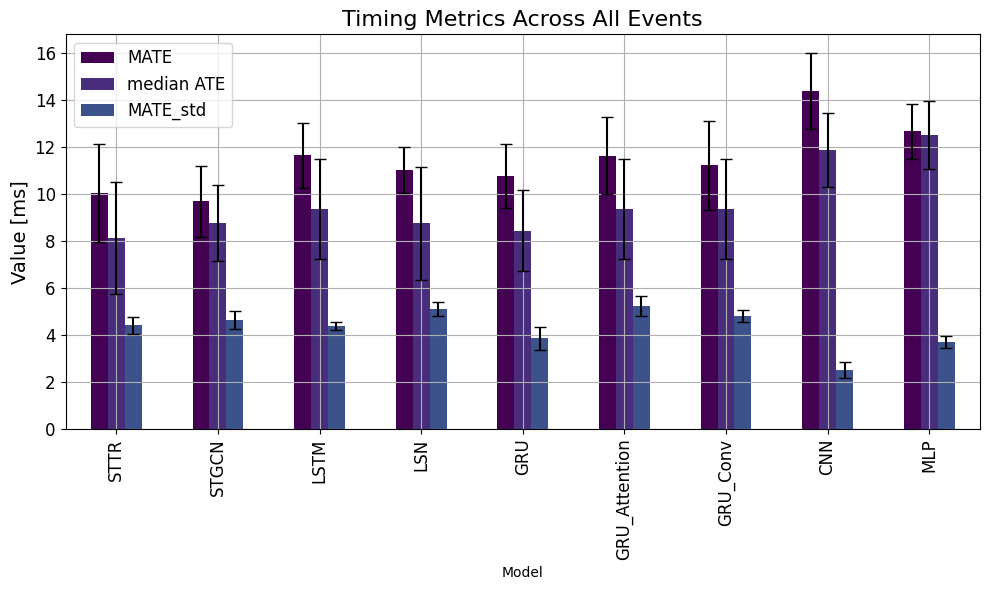

In [43]:
# Group and reorder
model_means = df.groupby('Model')[metrics + ms_metrics].mean().loc[model_order]
model_sem = df.groupby('Model')[metrics + ms_metrics].sem().loc[model_order]

# Plotting mean metrics with SEM as error bars using viridis colormap
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(model_means)))
# Plotting classification metrics
fig, ax1 = plt.subplots(figsize=(10, 6))
model_means[metrics] = model_means[metrics] * 1e2 # Convert to percentage
model_means[metrics].plot(kind='bar', yerr=model_sem[metrics], capsize=4, ax=ax1, color=bar_colors)

# Add MATE (ms) as a line plot with SEM as error bars using a secondary y-axis
ax3 = ax1.twinx()
ax3.errorbar(
    model_means.index,
    model_means['MATE'],
    yerr=model_sem['MATE'],
    color='tab:orange',
    marker='o',
    label='MATE (ms)',
    linewidth=1.5,
    markersize=10,
    capsize=4
)
ax3.set_ylabel('MATE (ms)', fontsize=14, color='black')
ax3.tick_params(axis='y', labelsize=12, colors='black')
ax3.legend(loc='upper right', fontsize=12)

ax1.set_title('Classification Metrics Across All Events', fontsize=16)
ax1.set_ylabel('Value [%]', fontsize=14)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)
plt.tight_layout()
plt.show()

# Plotting timing metrics
fig, ax2 = plt.subplots(figsize=(10, 6))
model_means[ms_metrics].plot(kind='bar', yerr=model_sem[ms_metrics], capsize=4, ax=ax2, color=bar_colors)

ax2.set_title('Timing Metrics Across All Events', fontsize=16)
ax2.set_ylabel('Value [ms]', fontsize=14)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)
plt.tight_layout()
plt.show()
